# BUISNESS CASE ⬇️

## OBJECTIVE 
While it is acknowledged that ABC Tech has operated as a mid-sized organization within the IT-enabled business segment for over a decade, and has diligently managed IT incidents/tickets within the framework of ITIL practices, including incident management, problem management, change management, and configuration management, recent findings from a customer survey have indicated a poor rating for the incident management process. Despite the maturity of these ITIL practices, an audit has suggested that further improvement initiatives may not provide a significant return on investment. Therefore, it is imperative for ABC Tech's management to address the shortcomings identified in the incident management process and seek viable solutions to enhance customer satisfaction and operational efficiency.


* Task 1:-Prepare a complete data analysis report on the given data.

* Task 2:-Develop a predictive model that assists ABC Tech in anticipating and identifying viable solutions for enhancing the incident management process. The aim             is to ensure improvements that lead to heightened levels of customer satisfaction and operational efficiency.
  
* Task 3:- Prepare the analysis report stating how model will help expanding the business by stating several factors including feature importance.






## Domain Analysis: Enhancing IT Service Management at ABC Tech


Domain: IT Service Management (ITSM) in the context of ABC Tech, a mid-size organization operating in the IT-enabled business sector.
  
(A) Organization Profile:
    
* ABC Tech has been operating as a mid-size organization in the IT-enabled business segment for over a decade.
* The company receives a significant volume of IT incidents/tickets, averaging between 22,000 to 25,000 incidents.
* ITIL (Information Technology Infrastructure Library) framework is employed for incident management, problem management, change management, and configuration         management processes.


(B) ITIL Practices:
  
* The ITIL practices implemented by ABC Tech have achieved a mature process level, as evidenced by a recent audit.* 
Despite the maturity of these practices, the audit suggests that further improvement initiatives may not provide a notable return on investment.

(C) Incident Management Improvement:
*  
Recent customer survey results indicate dissatisfaction with the incident management process, rating it as poo
* In response to these findings, ABC Tech management is actively seeking ways to enhance incident management to improve overall customer satisfaction.
n


(D) Introduction of Machine Learning (ML):

* ABC Tech management has recently explored the potential of leveraging Machine Learning (ML) techniques to enhance ITSM processes.
* ML is perceived as a promising approach for improving ITSM processes through prediction and automation.son.

(E) Key Areas Identified for ML Implementation:
* Predicting High Priority Tickets:
  ML can be used to predict high priority tickets (Priority 1 & 2), allowing proactive measures to prevent or address issues before they escalate.
* Incident Volume Forecasting:
  ML techniques can forecast incident volumes across different fields on a quarterly and annual basis, facilitating better resource allocation and technology          planning..
* Automatic Ticket Tagging:
  ML algorithms can automatically tag tickets with the appropriate priorities and assign them to the relevant departments, reducing reassignments and associated       delays.



* Predicting RFCs and ITSM Asset Misconfigurations:
  ML models can predict Request for Change (RFC) occurrences and identify potential failures or misconfigurations in ITSM assets, enabling preemptive actions to       mitigate risks.




#### Conclusion:
* The domain analysis provides insights into the challenges faced by ABC Tech in managing IT incidents and the potential of Machine Learning to address these          challenges.
* By applying ML techniques in key areas such as ticket prioritization, incident forecasting, automatic tagging, and risk prediction, ABC Tech aims to enhance its     ITSM processes, thereby improving customer satisfaction and operational efficiency.
.itigate risks.e
mptd operational efficiency.








### 1. Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import mysql.connector    # installing pymysql and mysql-connector package for making connections to database server
!pip install pymysql  
!pip install mysql-connector
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

##### MAKING CONNECTION TO DATA BASE SERVER

In [2]:
connection=mysql.connector.connect(host = " 18.136.157.135",
                                  user='dm_team',
                                  password='DM!$Team@&27920!')

##### CHECK THE NUMBER OF DATABASES AVAILABLE ON THE SERVER

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


##### MAKING CONNECTIONS TO DATABASE SERVER

In [4]:
connection=mysql.connector.connect(host = "18.136.157.135",
                                  user='dm_team',
                                  password='DM!$Team@&27920!',
                                  database = "project_itsm")

In [5]:
project= pd.read_sql_query("show tables",connection)
print(project)

  Tables_in_project_itsm
0           dataset_list


### 2. Importing the Data

In [6]:
data = pd.read_sql_query("select * from dataset_list",connection)
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [7]:
data.Priority.value_counts()

Priority
4     22717
5     16486
3      5323
NA     1380
2       697
1         3
Name: count, dtype: int64

### 3. Checking for Null values 

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

 ### 4. General info about the Data

In [9]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,incident,KM0000553,closed,26,05-02-2012 13:32,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,incident,KM0000611,closed,33,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,request for information,KM0000339,closed,3,29-03-2012 12:36,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,incident,KM0000611,closed,13,17-07-2012 11:49,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,incident,KM0000611,closed,2,10-08-2012 11:01,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [10]:
data.tail()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,incident,KM0001314,closed,0,31-03-2014 16:23,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,incident,KM0002360,closed,0,31-03-2014 15:03,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,incident,KM0000315,closed,0,31-03-2014 15:28,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,incident,KM0001287,closed,0,31-03-2014 15:35,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,incident,KM0000182,closed,0,31-03-2014 17:24,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [11]:
data.shape

(46606, 25)

In [12]:
data.describe()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,4,1825,1,42,34636,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,incident,KM0001106,closed,0,24-03-2014 08:54,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,37748,1106,46606,27468,7,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [13]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [14]:
data.select_dtypes(include=['int64','float64']).columns

Index([], dtype='object')

In [15]:
data.select_dtypes(include=['object']).columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

### 5. Exploratory Data Analysis 

#### --> Univariant Analysis

In [16]:
import sweetviz as sv # library for univariant analysis
my_report=sv.analyze(data) # passing the original dataframe
my_report.show_html() # arguments will generate to// the library

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [17]:
data.select_dtypes(include=['object','category']).columns.tolist()

['CI_Name',
 'CI_Cat',
 'CI_Subcat',
 'WBS',
 'Incident_ID',
 'Status',
 'Impact',
 'Urgency',
 'Priority',
 'number_cnt',
 'Category',
 'KB_number',
 'Alert_Status',
 'No_of_Reassignments',
 'Open_Time',
 'Reopen_Time',
 'Resolved_Time',
 'Close_Time',
 'Handle_Time_hrs',
 'Closure_Code',
 'No_of_Related_Interactions',
 'Related_Interaction',
 'No_of_Related_Incidents',
 'No_of_Related_Changes',
 'Related_Change']

### 6. Data Preprocessing and Feature Engineering

In [18]:
for i in data.columns:
    data[i].replace("", np.nan,inplace=True)

In [19]:
data.isna().sum() #cheking the Nan values

CI_Name                           0
CI_Cat                          111
CI_Subcat                       111
WBS                               0
Incident_ID                       0
Status                            0
Impact                            0
Urgency                           0
Priority                          0
number_cnt                        0
Category                          0
KB_number                         0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44322
Resolved_Time                  1780
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      114
Related_Interaction               0
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
Related_Change                46046
dtype: int64

In [20]:
# Dropping Column which have high null values.
data.drop(columns=['Reopen_Time'], inplace=True)
data.drop(columns=['No_of_Related_Incidents'], inplace=True)
data.drop(columns=['No_of_Related_Changes'], inplace=True)
data.drop(columns=['Related_Change'], inplace=True)

In [21]:
# lets fill all the null values with statistical methods
data.loc[data["CI_Cat"].isnull(),"CI_Cat"] = 'application'
data.loc[data["CI_Subcat"].isnull(),"CI_Subcat"] = "Server Based Application"
data.loc[data["No_of_Reassignments"].isnull(),"No_of_Reassignments"] =0
data.loc[data["Handle_Time_hrs"].isnull(),"Handle_Time_hrs"] = 0
data.loc[data["Closure_Code"].isnull(),"Closure_Code"] = "Other"
data.loc[data["No_of_Related_Interactions"].isnull(),"No_of_Related_Interactions"] = 1

In [22]:
data.isnull().sum()

CI_Name                          0
CI_Cat                           0
CI_Subcat                        0
WBS                              0
Incident_ID                      0
Status                           0
Impact                           0
Urgency                          0
Priority                         0
number_cnt                       0
Category                         0
KB_number                        0
Alert_Status                     0
No_of_Reassignments              0
Open_Time                        0
Resolved_Time                 1780
Close_Time                       0
Handle_Time_hrs                  0
Closure_Code                     0
No_of_Related_Interactions       0
Related_Interaction              0
dtype: int64

In [23]:
data.duplicated().sum() #checking duplicates

0

#### Converting Categorical data into Numerical data 

###### --> LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [25]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction'],
      dtype='object')

In [26]:
#CI_Name
data.CI_Name =enc.fit_transform(data.CI_Name )

#CI_Cat
data.CI_Cat =enc.fit_transform(data.CI_Cat )

#CI_Subc
data.CI_Subcat =enc.fit_transform(data.CI_Subcat )

#WBS
data.WBS =enc.fit_transform(data.WBS )

#Incident_ID
data.Incident_ID =enc.fit_transform(data.Incident_ID )

#Status
data.Status =enc.fit_transform(data.Status )

#Impact
data.Impact =enc.fit_transform(data.Impact )

#Urgency
data.Urgency =enc.fit_transform(data.Urgency )

#Priority
data.Priority =enc.fit_transform(data.Priority )

#number_cnt
data.number_cnt =enc.fit_transform(data.number_cnt )

#Category
data.Category =enc.fit_transform(data.Category )

#number_cnt
data.number_cnt =enc.fit_transform(data.number_cnt )

#Category
data.Category =enc.fit_transform(data.Category )

#KB_number
data.KB_number =enc.fit_transform(data.KB_number )

#Alert_Status
data.Alert_Status =enc.fit_transform(data.Alert_Status )


#Open_Time
data.Open_Time =enc.fit_transform(data.Open_Time )


#Resolved_Time
data.Resolved_Time =enc.fit_transform(data.Resolved_Time )

#Close_Time
data.Close_Time =enc.fit_transform(data.Close_Time )



#Closure_Code
data.Closure_Code =enc.fit_transform(data.Closure_Code )


#Related_Interaction
data.Related_Interaction =enc.fit_transform(data.Related_Interaction )




In [27]:
# Convert string into int.

In [28]:
data['No_of_Reassignments'] = data['No_of_Reassignments'].astype(int)
data['Handle_Time_hrs'] = data['Handle_Time_hrs'].astype(str)
data['No_of_Related_Interactions'] = data['No_of_Related_Interactions'].astype(int)

In [29]:
#No_of_Reassignments
data.No_of_Reassignments =enc.fit_transform(data.No_of_Reassignments )

#Handle_Time_hrs
data.Handle_Time_hrs =enc.fit_transform(data.Handle_Time_hrs )


#No_of_Related_Interactions
data.No_of_Related_Interactions =enc.fit_transform(data.No_of_Related_Interactions )

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   CI_Name                     46606 non-null  int32
 1   CI_Cat                      46606 non-null  int32
 2   CI_Subcat                   46606 non-null  int32
 3   WBS                         46606 non-null  int32
 4   Incident_ID                 46606 non-null  int32
 5   Status                      46606 non-null  int32
 6   Impact                      46606 non-null  int32
 7   Urgency                     46606 non-null  int32
 8   Priority                    46606 non-null  int32
 9   number_cnt                  46606 non-null  int64
 10  Category                    46606 non-null  int64
 11  KB_number                   46606 non-null  int32
 12  Alert_Status                46606 non-null  int32
 13  No_of_Reassignments         46606 non-null  int64
 14  Open_T

In [31]:
data.isnull().sum()

CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64

In [32]:
# Now there is no null values in dataset

###### --> Processed Data

In [33]:
data.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,2741,11,57,137,0,0,3,3,3,28044,1,413,0,26,4201,3525,3659,19910,6,0,2
1,2863,1,57,70,1,0,2,2,2,19341,1,456,0,32,12770,1180,1222,21447,10,0,3
2,990,1,10,74,2,0,5,2,5,24089,3,244,0,3,32203,13273,13734,22731,4,0,4
3,2863,1,57,70,3,0,3,3,3,29998,1,456,0,13,18529,15381,15862,21362,5,0,5
4,2863,1,57,70,4,0,3,3,3,16110,1,456,0,2,10522,8421,8699,18368,6,0,6


In [34]:
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,2741,11,57,137,0,0,3,3,3,28044,1,413,0,26,4201,3525,3659,19910,6,0,2
1,2863,1,57,70,1,0,2,2,2,19341,1,456,0,32,12770,1180,1222,21447,10,0,3
2,990,1,10,74,2,0,5,2,5,24089,3,244,0,3,32203,13273,13734,22731,4,0,4
3,2863,1,57,70,3,0,3,3,3,29998,1,456,0,13,18529,15381,15862,21362,5,0,5
4,2863,1,57,70,4,0,3,3,3,16110,1,456,0,2,10522,8421,8699,18368,6,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,2455,1,45,59,46601,0,3,3,3,10891,1,1025,0,0,34173,33127,34017,330,6,0,43057
46602,2453,1,45,59,46602,0,3,3,3,37599,1,1821,0,0,34166,33098,33986,1496,12,0,43052
46603,1096,3,21,73,46603,0,4,4,4,42720,1,225,0,0,34169,33100,33988,247,1,0,43053
46604,2834,1,57,59,46604,0,3,3,3,32679,1,1003,0,0,34170,33107,33996,406,10,0,43054


### 7. Feature Selection 

#### (A) Checking for correlation 

In [35]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction'],
      dtype='object')

In [36]:
corr_data=data[['CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status', 'Impact',
       'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'No_of_Reassignments', 'Open_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'Related_Interaction']]

<Axes: >

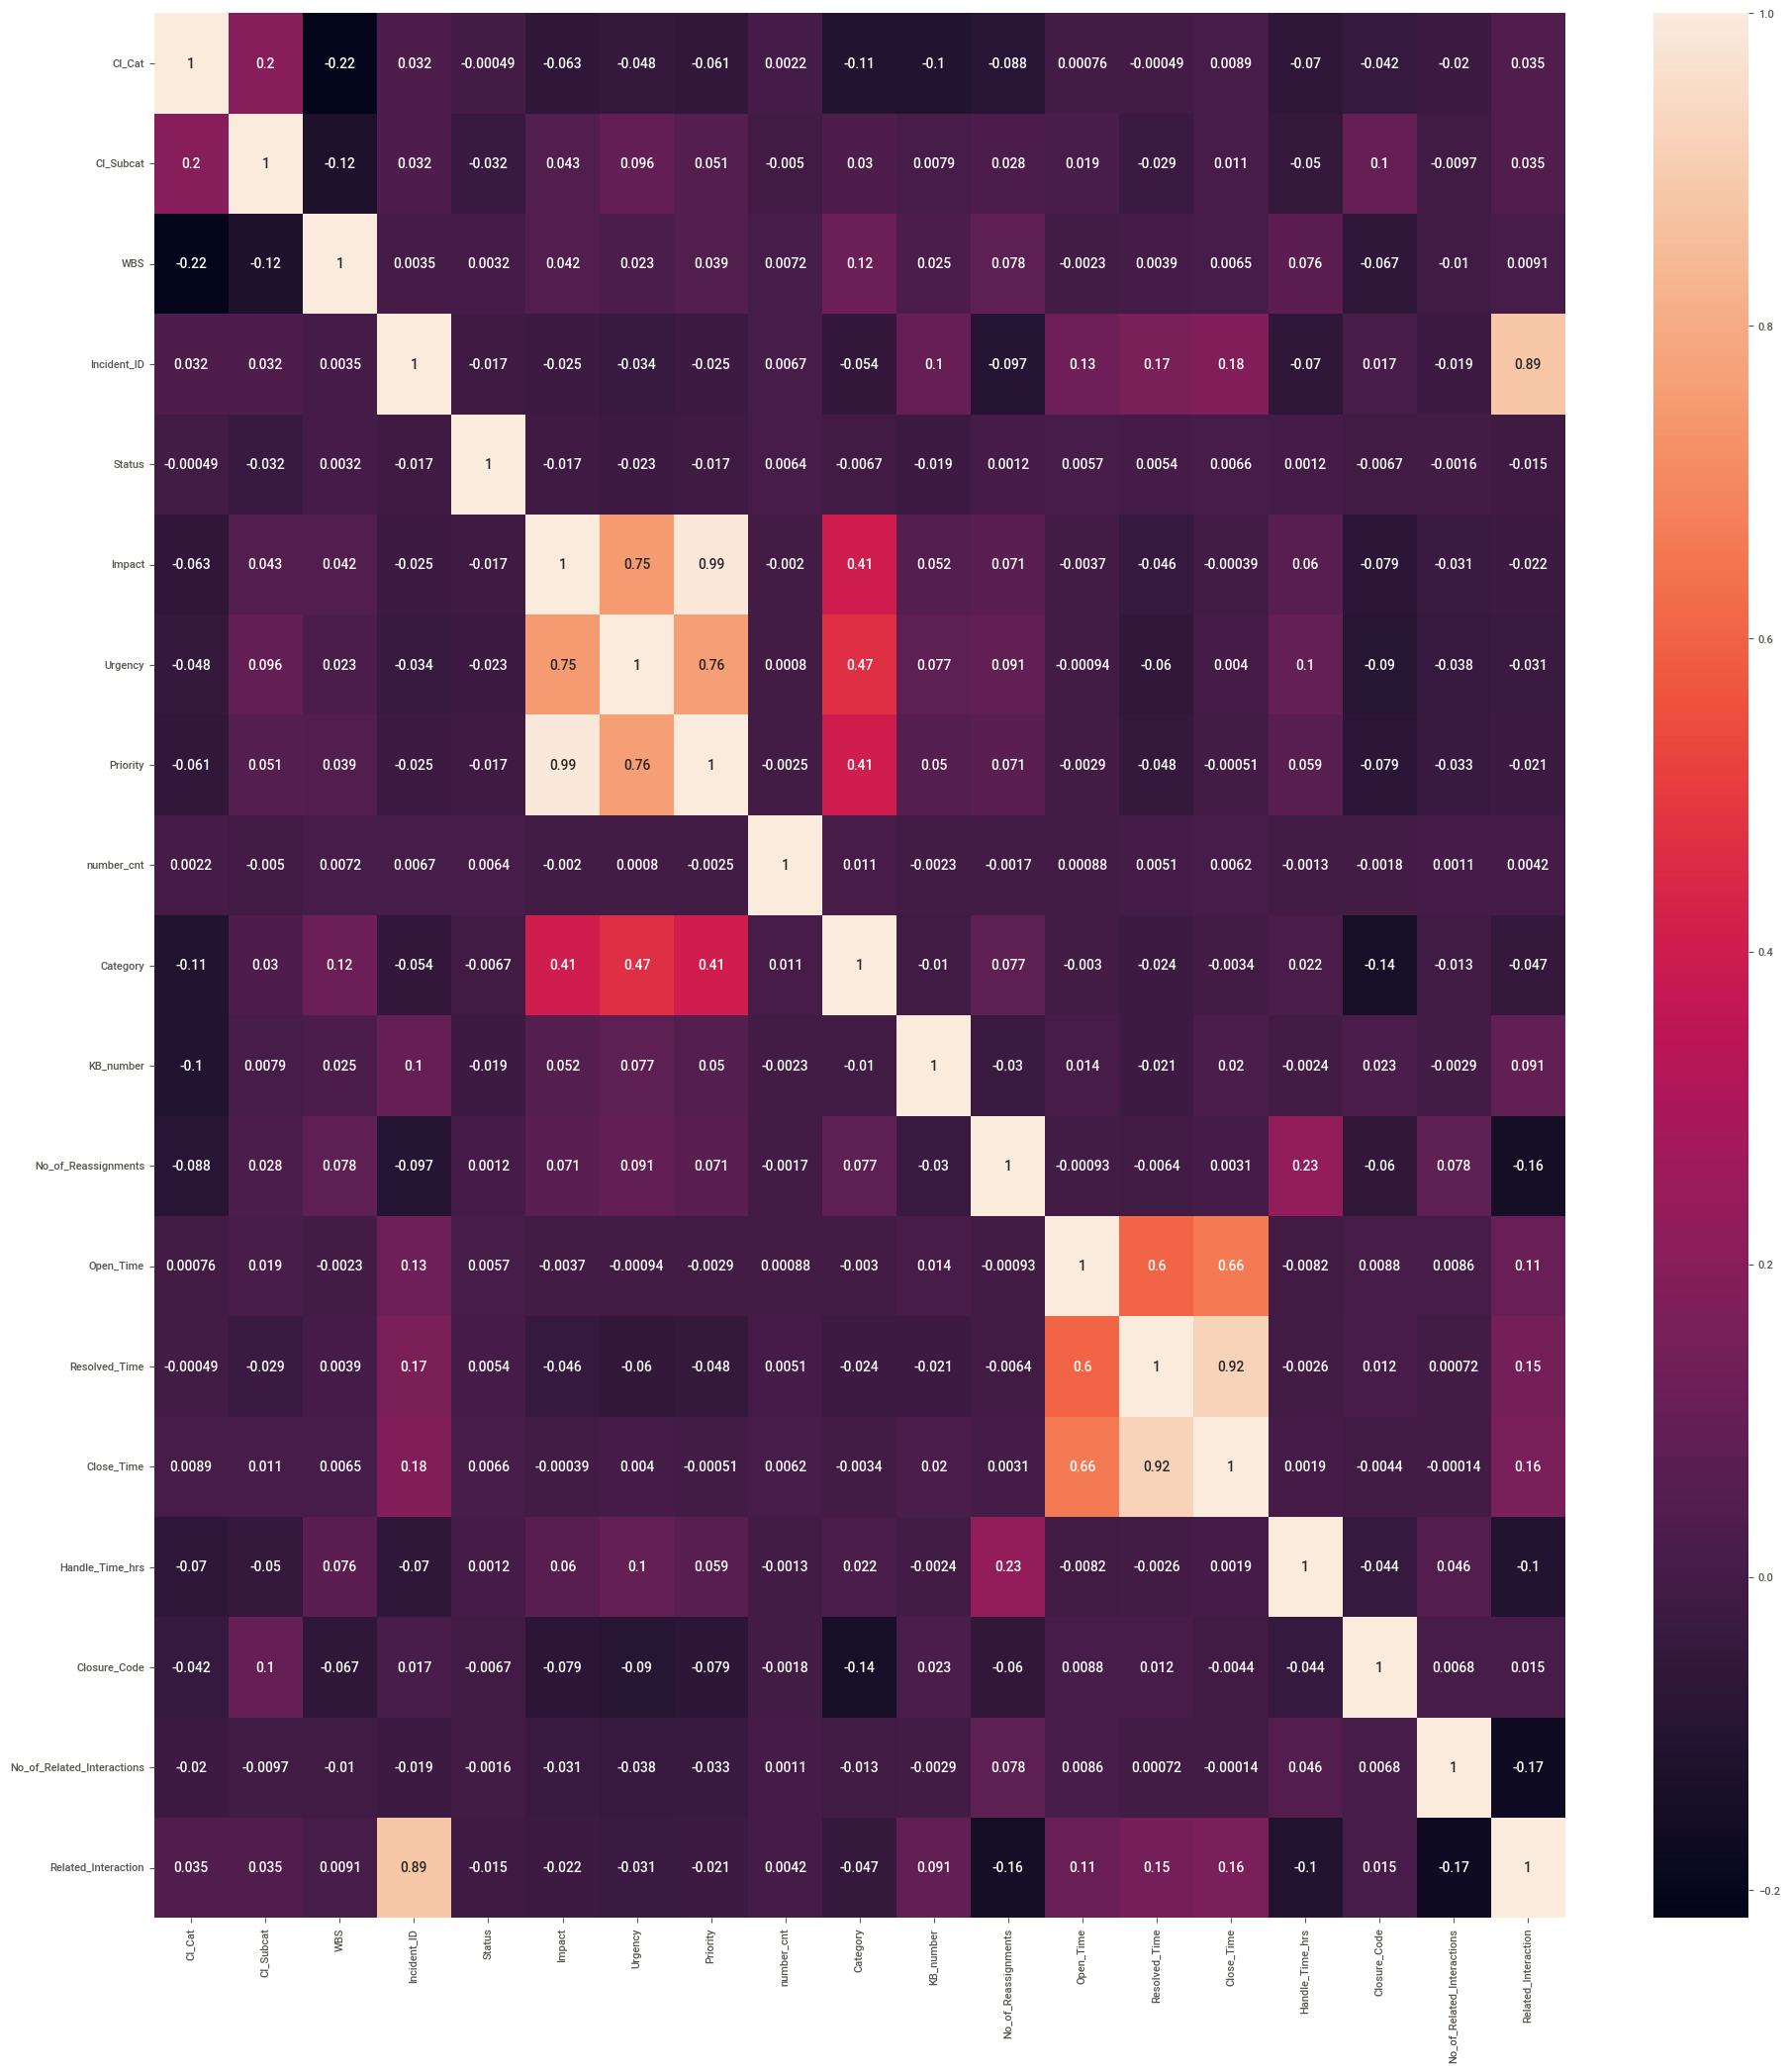

In [37]:
plt.figure(figsize=(23,25))
sns.heatmap(corr_data.corr(),annot=True)

#### (B) Checking outliers

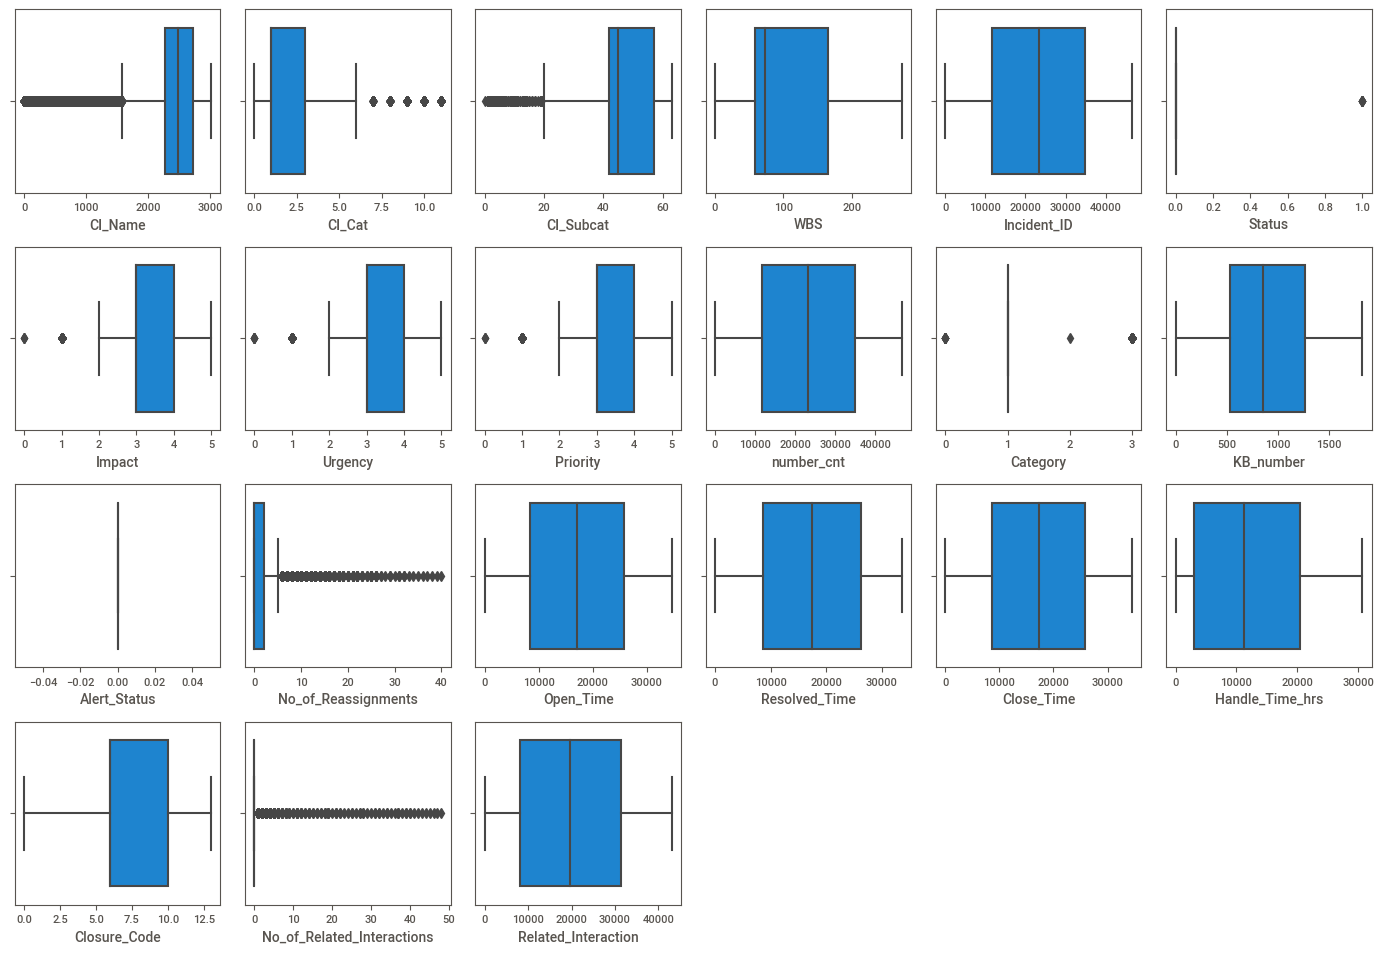

In [38]:
plt.figure(figsize=(14, 14))
plotnumber = 1

for i in data:
    plt.subplot(6, 6, plotnumber)
    sns.boxplot(x=data[i])
    plotnumber += 1
    if plotnumber > 27:
        break

plt.tight_layout()
plt.show()

In [39]:
data.columns

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction'],
      dtype='object')

##### --> Splitting the data  into Train and Test Split 

In [40]:
X=data.drop('Priority',axis=1)
y=data.Priority

In [41]:
X.shape

(46606, 20)

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)

(37284, 20)
(9322, 20)


In [44]:
X_train

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
34368,1014,1,10,76,34368,0,4,4,10728,3,401,0,0,5706,5476,5665,17404,11,0,31625
29819,2376,1,45,58,29819,0,4,4,29404,3,1412,0,6,24358,18605,19213,12124,6,0,27333
42581,2725,11,57,59,42581,0,3,3,37076,1,1587,0,0,12825,12340,12751,1638,10,0,39259
5815,2303,1,45,14,5815,0,3,3,6237,1,68,0,3,17344,27068,27847,3388,6,2,0
31158,2841,1,57,43,31158,0,3,3,2877,1,292,0,4,29500,4178,4316,27746,10,0,28694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2879,1,57,186,11284,0,3,3,30290,1,742,0,9,6428,23431,24124,11553,10,0,10344
44732,920,3,9,73,44732,0,3,3,42501,1,786,0,0,23566,22993,23671,26047,11,1,0
38158,2487,1,45,215,38158,0,3,3,35461,1,856,0,1,22162,21419,22063,16636,6,0,35126
860,2584,1,45,186,860,0,3,3,19912,1,1020,0,1,30109,781,817,16497,10,0,665


In [45]:
X_test

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
10214,996,1,10,92,10214,0,4,4,35040,1,1576,0,2,3674,21869,22510,29841,1,0,9223
17442,2816,1,57,142,17442,0,4,4,34709,1,51,0,8,31773,1184,1226,12520,10,0,15906
41471,2684,11,45,77,41471,0,3,3,3057,1,166,0,1,6096,11097,11464,6563,6,2,0
46248,2684,11,45,77,46248,0,4,4,8803,1,1212,0,0,31143,30444,31297,29394,10,0,42706
9672,2815,1,57,94,9672,0,1,1,8179,1,33,0,1,34412,266,283,26806,10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44291,2267,1,42,221,44291,0,3,3,14577,1,904,0,1,20955,22930,23606,13348,10,0,40805
14074,2304,1,45,130,14074,0,4,4,34400,1,1403,0,0,20055,19418,20032,18274,10,0,1
4048,2863,1,57,70,4048,0,3,3,40116,1,456,0,1,10570,19396,20006,17392,10,0,3585
19716,2542,1,45,83,19716,0,2,2,33496,1,811,0,4,9474,10492,10843,5305,10,0,17955


In [46]:
y_train

34368    4
29819    4
42581    3
5815     3
31158    3
        ..
11284    3
44732    3
38158    3
860      3
15795    2
Name: Priority, Length: 37284, dtype: int32

In [47]:
y_test

10214    4
17442    4
41471    3
46248    4
9672     1
        ..
44291    3
14074    4
4048     3
19716    2
26435    3
Name: Priority, Length: 9322, dtype: int32

##### --> Feature Scaling

In [48]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [49]:
# Let's see oue target variable is balanced or not if it's not balanced. So, we have to apply SMOTE for balanced the data.
y.value_counts()
# here we can see our target variable is not balanced.

Priority
3    22717
4    16486
2     5323
5     1380
1      697
0        3
Name: count, dtype: int64

### 8.Model Creation

#### (1) LogisticRegression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creating a linear regression model
model = LinearRegression()

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the testing data
predictions = model.predict(X_test)

# Calculating and printing mean squared error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

Mean Squared Error: 0.008853419616556165
R-squared: 0.984736847145395


#### (2) Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor  # Importing DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Importing regression metrics

# Creating a DecisionTreeRegressor object with specified hyperparameters
dt = DecisionTreeRegressor(max_depth=10, min_samples_split=30, min_samples_leaf=20, random_state=42)

# Training the model
dt.fit(X_train, y_train)

# Predicting on the test set
y_hat = dt.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Training score
y_train_predict = dt.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_predict)
r2_train = r2_score(y_train, y_train_predict)

print("Mean Squared Error (Training):", mse_train)
print("R-squared (Training):", r2_train)

# Predicting on the test set
y_hat = dt.predict(X_test)

# Evaluating the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r2)

Mean Squared Error: 0.0003780192820853305
R-squared: 0.9993483008448321
Mean Squared Error (Training): 0.0002481453666948786
R-squared (Training): 0.999567123538247
Mean Squared Error (Test): 0.0003780192820853305
R-squared (Test): 0.9993483008448321


#### -> Hyperparameter Tuning for Decision Tree

In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Create a DecisionTreeRegressor object
dt = DecisionTreeRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform hyperparameter tuning on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_hat = best_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)
print("Mean Squared Error (Test):", mse)
print("R-squared (Test):", r2)

Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean Squared Error (Test): 0.00021454623471358077
R-squared (Test): 0.9996301257461366


#### (3) Random Forest 

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Creating a RandomForestRegressor object with 100 decision trees
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_reg.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_reg.predict(X_test)

# Calculating the F1-score (this will result in an error since F1-score is for classification)
# f_score = f1_score(y_test, y_pred)

# Instead, let's evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0002172924265179146
R-squared: 0.9996253913556872


#### -> Hyperparameter Tuning for Random Forest

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]
max_depth.append(None)
min_samples_split = [30, 25, 10]
min_samples_leaf = [5, 10, 15]
bootstrap = [True]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Create the base model
rf_reg1 = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_reg1,
    scoring={'mse': 'neg_mean_squared_error', 'r2': 'r2'},  # Use MSE and R2 as scoring metrics
    refit='mse',  # Choose one of the scoring metrics for refitting
    param_distributions=random_grid,
    n_iter=100,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to the data
rf_cv.fit(X_train, y_train)

# Get the best parameters
rf_best_params = rf_cv.best_params_
print(f"Best parameters: {rf_best_params}")

# Create the RandomForestRegressor with the best parameters
rf_reg2 = RandomForestRegressor(**rf_best_params)

# Train the model with the best parameters
rf_reg2.fit(X_train, y_train)

# Make predictions
y_predict = rf_reg2.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predict)
print("Mean Squared Error:", mse)

# Calculate the R-squared (R2)
r2 = r2_score(y_test, y_predict)
print("R-squared:", r2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}
Mean Squared Error: 0.00032599028326623644
R-squared: 0.9994379980009866


#### (4) Gradient Boosting 

In [55]:
from sklearn.ensemble import GradientBoostingRegressor  # Import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score  # Import mean_squared_error and r2_score for regression

# Model creation
gbm = GradientBoostingRegressor()  # Object creation

# Fit the model
gbm.fit(X_train, y_train)  # Fit the data

# Predict on the test set
y_gbm = gbm.predict(X_test)  # Predict prices

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_gbm)  # Calculate Mean Squared Error

# Calculate R-squared
r2 = r2_score(y_test, y_gbm)  # Calculate R-squared

mse, r2  # Print Mean Squared Error and R-squared

(0.00016521440005489577, 0.9997151730347104)

#### -> Gradient Boost Hypertuning Parameters

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


# Creating a Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4, 5]  # Maximum depth of the individual estimators
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150}
Mean Squared Error: 0.0001668584973284337
R-squared: 0.9997123386374852


#### (5) XG Boost Model

In [57]:
from xgboost import XGBRegressor  # Import XGBRegressor for regression
from sklearn.metrics import mean_squared_error, r2_score  # Import mean_squared_error and r2_score for evaluation

# Model creation
xgb_r = XGBRegressor()  # Object creation

# Fit the model
xgb_r.fit(X_train, y_train)  # Fit the data

# Predict on the test set
y_hat = xgb_r.predict(X_test)  # Predict prices

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_hat)  # Calculate MSE

# Calculate R-squared
r2 = r2_score(y_test, y_hat)  # Calculate R-squared

mse, r2  # Print MSE and R-squared

(0.00021451754956658186, 0.9996301751988681)

#### -> XG Boost Hypertuning Parameters

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

param_grid = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

# Initialize XGBRegressor
XGB = XGBRegressor(random_state=42, verbosity=0, silent=0)

# RandomizedSearchCV
rcv = RandomizedSearchCV(estimator=XGB, scoring='neg_mean_squared_error', param_distributions=param_grid, 
                         n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
                        
rcv.fit(X_train, y_train)  # Training data on RandomizedSearchCV

cv_best_params = rcv.best_params_  # Get best parameters
print(f"Best parameters: {cv_best_params}")

# Initialize XGBRegressor with best parameters
XGB2 = XGBRegressor(**cv_best_params)
XGB2.fit(X_train, y_train)  # Training

y_predict = XGB2.predict(X_test)  # Testing

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predict)

# Calculate R-squared
r2 = r2_score(y_test, y_predict)

mse, r2  # Print MSE and R-squared

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'reg_lambda': 0.2, 'reg_alpha': 0.4, 'n_estimators': 115, 'max_depth': 12, 'learning_rate': 0.2, 'gamma': 0}


(0.0002198521851401517, 0.9996209783730415)

#### (6) Neural Network

In [59]:
from sklearn.neural_network import MLPRegressor

# Create MLPRegressor model
model = MLPRegressor(hidden_layer_sizes=(50, 3),
                     learning_rate_init=0.1,
                     max_iter=100,
                     random_state=10)

# Train the model
model.fit(X_train, y_train)

# Predict target values for the test set
y_predict = model.predict(X_test)

# Predict target values for the training set (optional, for evaluation)
y_train_predict = model.predict(X_train)


# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculating R-squared
r2 = r2_score(y_test, predictions)
print("R-squared:", r2)

Mean Squared Error: 0.0001668584973284337
R-squared: 0.984736847145395


#### (7) Support Vector Machine (SVM)

In [51]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# X = Your feature matrix
# y = Your target vector

# Initialize SVM regressor
svm_regressor = SVR(kernel='linear', C=1.0)

# Train the regressor on the training data
svm_regressor.fit(X_train, y_train)

# Predict target values for the test set
y_pred = svm_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.017591127087610407
R-squared: 0.9696731801663525


### Model Classification Report

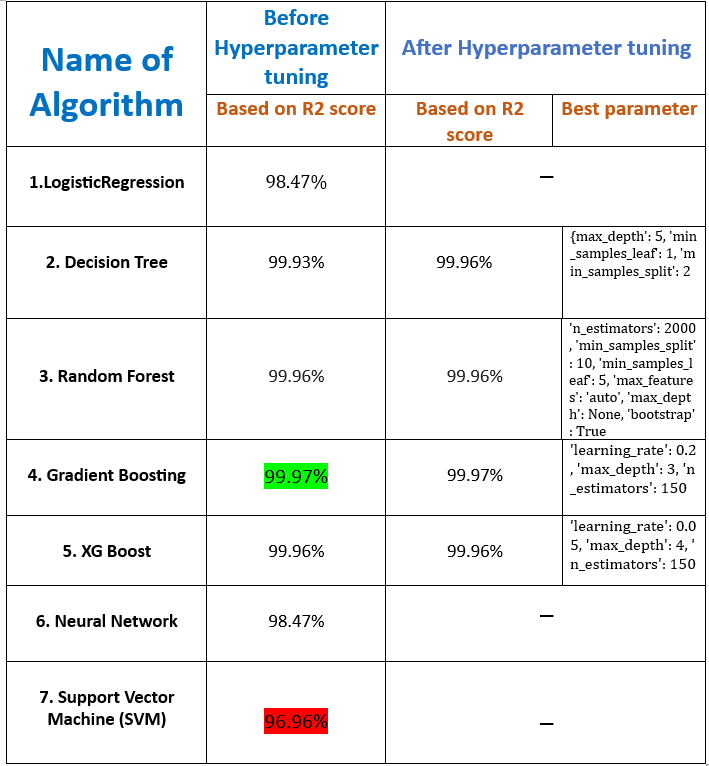

#### As shown in the above table the Gradient Boosting gives the best accuracy of 99.97% whereas Support Vector Machine (SVM) without             hyperparametertunning gives the lowest accuracy of 96.96%.

### Suggestions to the Company :-
Based on the domain analysis provided, here are some suggestions for ABC Tech:

(1.) Focus on Incident Management Improvement:

* Given the poor rating in incident management from recent customer survey results, prioritize efforts to enhance this aspect of ITSM.
* Conduct a detailed analysis to identify specific pain points and areas for improvement within the incident management process.


(2.) Utilize Machine Learning for Predictive Analysis:

* Explore the implementation of Machine Learning techniques to predict high-priority tickets and forecast incident volumes.
* Leverage ML algorithms to automate ticket tagging and assignment processes, reducing manual effort and improving efficiency.


(3.)Align Improvement Initiatives with Business Objectives:

* Ensure that improvement initiatives align with the overarching business objectives of ABC Tech, focusing on enhancing customer satisfaction and operational          efficiency.
* Prioritize initiatives that offer tangible benefits and align with the organization's long-term strategic goals.


(4.) Continuous Monitoring and Evaluation:

* Establish mechanisms for continuous monitoring and evaluation of ITSM processes, including incident management.
* Regularly assess the effectiveness of implemented improvements and adjust strategies as needed based on performance metrics and feedback.


(5.) Invest in Employee Training and Development:

* Provide training and development opportunities for employees involved in ITSM processes, particularly in areas related to Machine Learning and predictive analysis.
* Empower staff with the skills and knowledge required to effectively leverage ML tools and techniques for improving incident management.


(6.) Collaborate with Industry Experts and Peers:

* Foster collaboration with industry experts, peers, and stakeholders to exchange best practices and insights related to ITSM and Machine Learning.
* Participate in conferences, workshops, and knowledge-sharing forums to stay abreast of the latest trends and innovations in the field.


(7.) Maintain a Customer-Centric Approach:

* Keep customer satisfaction at the forefront of all improvement efforts, ensuring that changes made to ITSM processes ultimately benefit end-users.
* Solicit feedback from customers regularly and incorporate their input into the ongoing refinement of incident management practices.


##### By implementing these suggestions, ABC Tech can effectively enhance its incident management process and overall ITSM capabilities, leading to improved customer satisfaction and operational efficiency.